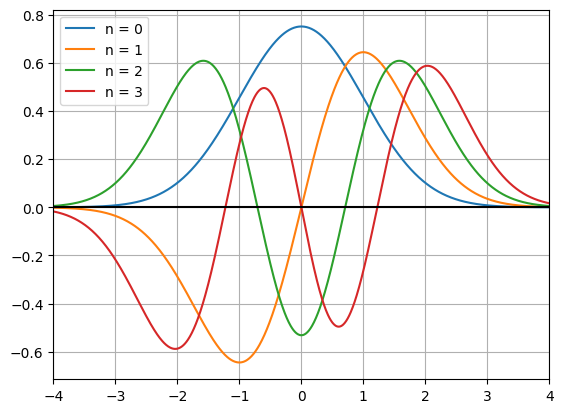

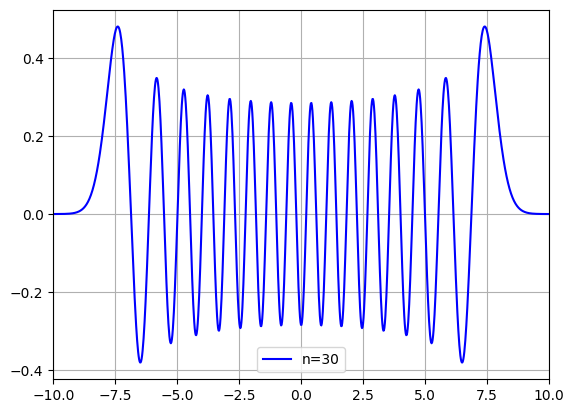

At n = 5, the root mean squared position = 2.3


In [ ]:
#Solution of Assignment_7
#Instructor: Gopal Hazra
#Computational Physics-PHY617, 
#Dept of Physics, IIT Kanpur


#Question-1

# 1.1
import numpy as np
import matplotlib.pyplot as plt
import math

def H(n,x): # Hermite polynomial
    if n==0:
        return 1
    elif n==1:
        return 2*x
    else:
        H_P = 1 # H0
        H_C = 2*x # H1
        for i in range(2,n+1):
            H_N = 2*x*H_C - (2*(i-1)*H_P)
            H_P,H_C = H_C,H_N
        return H_C

def psi(n,x): # Wave function
    N = 1/(np.sqrt((2**n)*(math.factorial(n))* (np.sqrt(np.pi))))
    psi = N*np.exp((-x**2)/2)*H(n,x)
    return psi

x_1 = np.linspace(-4,4,1000)

for n in range(4):
    plt.plot(x_1,psi(n,x_1),label=f'n = {n}')
plt.grid()
plt.axhline(y=0, color='black')
plt.xlim(-4,4)
plt.legend()
plt.show()

# 1.2

x_2 = np.linspace(-10,10,1000)
plt.plot(x_2,psi(30,x_2),label='n=30',color='b')
plt.xlim(-10,10)
plt.legend()
plt.grid()
plt.show()

# 1.3
from numpy import ones,copy,cos,tan,pi,linspace
def gaussxw(N):


    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))


    epsilon = 1e-15
    delta = 1.0
    while delta > epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))


    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def f(x):
    return x**2 * psi(5,x)**2
N=100
a= -10
b =10

x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w


s =0.0
for k in range(N):
    s += wp[k]*f(xp[k])
print('At n = 5, the root mean squared position =',np.round(np.sqrt(s),1))

In [ ]:
#Question-2


import numpy as np
def gaussian_quadrature(n,x):
    nodes,weights = np.polynomial.legendre.leggauss(n)
    return nodes, weights

nodes = np.array(gaussian_quadrature(5,x)[0])
weights = np.array(gaussian_quadrature(5,x)[1])

def f(x):
    return np.cos(np.pi*x/2)
result = 0

for i in range(len(nodes)):
    result += weights[i]*f(nodes[i])

def f(y):
    return np.cos(np.pi*y/2)
result1 = 0

for i in range(len(nodes)):
    result1 += weights[i]*f(nodes[i])
print("Value od integral using gaussian quadrature = ", np.round(result*result1,4))

Value od integral using gaussian quadrature =  1.6211


In [ ]:
# Question-2
import numpy as np
from numpy import ones,copy,cos,tan,pi,linspace
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
def H(n,x):
    if n == 0 : return 1
    if n == 1 : return 2*x
    if n > 1 :
        return 2*x*H(n-1,x) - 2*(n-1)*H(n-2,x)
def f(x):
    return np.cos(np.pi*x/2)
N=5
a= -1.0
b =1.0
# Calculate the sample points and weights, then map them # to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s =0.0
for k in range(N):
    s += wp[k]*f(xp[k])
print('Value of the integration is ',s**2)

Value of the integration is  1.621139117063862


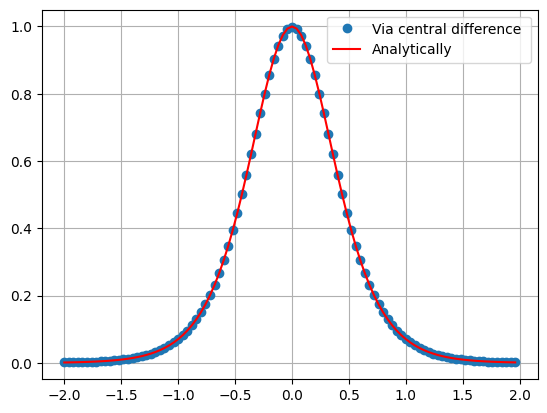

In [ ]:
# Question-3

N = 100
h  = (4/N)

def func(x):
    t = 1 + 0.5*np.tanh(2*x)
    return t

def der_func(x):
    return 1/(np.cosh(2*x))**2

x1 = np.arange(-2,2,h)


c_diff = [(func(x1[i] + h ) - func(x1[i]- h))/(2*h) for i in range(len(x1))]
plt.plot(x1,c_diff,'o',label= 'Via central difference ')
plt.plot(x1,der_func(x1),'r', label = 'Analytically')
plt.grid()
plt.legend()
plt.show()

#Question-4

#This is very simple to calculate. 